In [ ]:
# Introdução - Long Short Term Memory

# Univariate time series forescasting
import numpy as np
from matplotlib import pyplot
from numpy import sqrt
from numpy import asarray
from numpy import random
from pandas import read_csv
from keras import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split

In [ ]:
# Divide uma sequência em amostras
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# encontra o fim desse padrão
		end_ix = i + n_steps
		# verifica para o tamanho da sequência
		if end_ix > len(sequence)-1:
			break
		# Pega a entrada e saída para esse padrão
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return asarray(X), asarray(y)

In [ ]:
# Carrega o conjunto de dados
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'
df = read_csv(path, header=0, index_col=0, squeeze=True)

# Pega os valores
values = df.values.astype('float32')
print(values)

[ 6550.  8728. 12026. 14395. 14587. 13791.  9498.  8251.  7049.  9545.
  9364.  8456.  7237.  9374. 11837. 13784. 15926. 13821. 11143.  7975.
  7610. 10015. 12759.  8816. 10677. 10947. 15200. 17010. 20900. 16205.
 12143.  8997.  5568. 11474. 12256. 10583. 10862. 10965. 14405. 20379.
 20128. 17816. 12268.  8642.  7962. 13932. 15936. 12628. 12267. 12470.
 18944. 21259. 22015. 18581. 15175. 10306. 10792. 14752. 13754. 11738.
 12181. 12965. 19990. 23125. 23541. 21247. 15189. 14767. 10895. 17130.
 17697. 16611. 12674. 12760. 20249. 22135. 20677. 19933. 15388. 15113.
 13401. 16135. 17562. 14720. 12225. 11608. 20985. 19692. 24081. 22114.
 14220. 13434. 13598. 17187. 16119. 13713. 13210. 14251. 20139. 21725.
 26099. 21084. 18024. 16722. 14385. 21342. 17180. 14577.]


<ipython-input-6-aa87f0d78f61>:3: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  df = read_csv(path, header=0, index_col=0, squeeze=True)


In [ ]:
# Especifica o tamanho da janela
n_steps = 5

# Divide em amostras
X, y = split_sequence(values, n_steps)
print(X[0:10])
print(y[0:10])
print(X.shape)
print(y.shape)

[[ 6550.  8728. 12026. 14395. 14587.]
 [ 8728. 12026. 14395. 14587. 13791.]
 [12026. 14395. 14587. 13791.  9498.]
 [14395. 14587. 13791.  9498.  8251.]
 [14587. 13791.  9498.  8251.  7049.]
 [13791.  9498.  8251.  7049.  9545.]
 [ 9498.  8251.  7049.  9545.  9364.]
 [ 8251.  7049.  9545.  9364.  8456.]
 [ 7049.  9545.  9364.  8456.  7237.]
 [ 9545.  9364.  8456.  7237.  9374.]]
[13791.  9498.  8251.  7049.  9545.  9364.  8456.  7237.  9374. 11837.]
(103, 5)
(103,)


In [ ]:
# Reshape em [samples, timesteps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))
print(X[0:5,])
print(y[0:5])
print(X.shape)

[[[ 6550.]
  [ 8728.]
  [12026.]
  [14395.]
  [14587.]]

 [[ 8728.]
  [12026.]
  [14395.]
  [14587.]
  [13791.]]

 [[12026.]
  [14395.]
  [14587.]
  [13791.]
  [ 9498.]]

 [[14395.]
  [14587.]
  [13791.]
  [ 9498.]
  [ 8251.]]

 [[14587.]
  [13791.]
  [ 9498.]
  [ 8251.]
  [ 7049.]]]
[13791.  9498.  8251.  7049.  9545.]
(103, 5, 1)


In [ ]:
# Divide os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(72, 5, 1) (31, 5, 1) (72,) (31,)


In [ ]:
# Define o modelo
model = Sequential()
model.add(LSTM(100, activation='LeakyReLU', input_shape=(n_steps,1)))
model.add(Dense(50, activation='LeakyReLU'))
model.add(Dense(50, activation='LeakyReLU'))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 50)                5050      
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 48451 (189.26 KB)
Trainable params: 48451 (189.26 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compila o modelo
model.compile(optimizer='adam', loss='mse')

# Treina o modelo
history = model.fit(X_train, y_train, epochs=300, batch_size=10, verbose=1, validation_split=0.3)

Epoch 1/300
5/5 [==============================] - 3s 123ms/step - loss: 175254688.0000 - val_loss: 116480488.0000
Epoch 2/300
5/5 [==============================] - 0s 12ms/step - loss: 96583056.0000 - val_loss: 49288796.0000
Epoch 3/300
5/5 [==============================] - 0s 16ms/step - loss: 47506072.0000 - val_loss: 19006824.0000
Epoch 4/300
5/5 [==============================] - 0s 16ms/step - loss: 20611322.0000 - val_loss: 16360929.0000
Epoch 5/300
5/5 [==============================] - 0s 16ms/step - loss: 23972992.0000 - val_loss: 18347422.0000
Epoch 6/300
5/5 [==============================] - 0s 16ms/step - loss: 18928128.0000 - val_loss: 15027491.0000
Epoch 7/300
5/5 [==============================] - 0s 18ms/step - loss: 14646477.0000 - val_loss: 12830432.0000
Epoch 8/300
5/5 [==============================] - 0s 14ms/step - loss: 15684430.0000 - val_loss: 14428186.0000
Epoch 9/300
5/5 [==============================] - 0s 16ms/step - loss: 13752817.0000 - val_loss: 130

In [ ]:
# Plota a curva de aprendizado
def plot_learning_curve():
  pyplot.title('Learning Curves')
  pyplot.xlabel('Epoch')
  pyplot.ylabel('Error')
  pyplot.plot(history.history['loss'], label='train')
  pyplot.plot(history.history['val_loss'], label='val')
  pyplot.legend()
  pyplot.show()

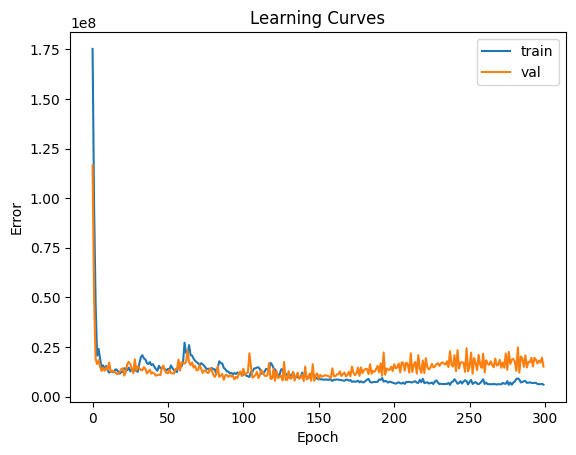

In [ ]:
plot_learning_curve()

In [ ]:
# Avalia o modelo
mse = model.evaluate(X_test, y_test, verbose=0)
print('MSE: %.3f, RMSE: %.3f' % (mse, sqrt(mse)))

MSE: 7151000.500, RMSE: 2674.135


In [ ]:
# Vamos ver as predições
predictions = model.predict(X_test)
print(predictions)

1/1 [==============================] - 0s 462ms/step
[[14838.805 ]
 [11058.563 ]
 [ 8928.91  ]
 [10436.802 ]
 [13176.189 ]
 [16594.258 ]
 [15654.993 ]
 [10284.228 ]
 [14766.1045]
 [18842.564 ]
 [13073.999 ]
 [13266.14  ]
 [12785.514 ]
 [24756.074 ]
 [23183.781 ]
 [13755.996 ]
 [ 6432.3867]
 [16775.055 ]
 [13950.763 ]
 [15289.416 ]
 [22205.094 ]
 [ 7968.905 ]
 [ 9525.934 ]
 [ 8218.022 ]
 [23000.973 ]
 [10147.888 ]
 [11019.641 ]
 [14551.991 ]
 [15338.13  ]
 [12391.378 ]
 [13411.073 ]]


In [ ]:
predictions.shape

(31, 1)

In [ ]:
# Compara predições com valores verdadeiros
pred = predictions.reshape((predictions.shape[0],))
np.stack((y_test,pred),axis=1)

array([[13821.    , 14838.805 ],
       [12143.    , 11058.563 ],
       [12760.    ,  8928.91  ],
       [11608.    , 10436.802 ],
       [15926.    , 13176.189 ],
       [15189.    , 16594.258 ],
       [17562.    , 15654.993 ],
       [ 7962.    , 10284.228 ],
       [18024.    , 14766.1045],
       [14720.    , 18842.564 ],
       [12759.    , 13073.999 ],
       [17130.    , 13266.14  ],
       [ 8816.    , 12785.514 ],
       [21084.    , 24756.074 ],
       [21725.    , 23183.781 ],
       [18944.    , 13755.996 ],
       [ 9374.    ,  6432.3867],
       [20900.    , 16775.055 ],
       [12256.    , 13950.763 ],
       [12268.    , 15289.416 ],
       [21247.    , 22205.094 ],
       [ 8251.    ,  7968.905 ],
       [12267.    ,  9525.934 ],
       [ 7610.    ,  8218.022 ],
       [23541.    , 23000.973 ],
       [ 9364.    , 10147.888 ],
       [11837.    , 11019.641 ],
       [19990.    , 14551.991 ],
       [17010.    , 15338.13  ],
       [12965.    , 12391.378 ],
       [15